In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
training_df = pd.read_csv('/content/drive/MyDrive/Practicum/new_training.csv')

In [ ]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4223 entries, 0 to 4222
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              4223 non-null   int64  
 1   player_name             4223 non-null   object 
 2   team_abbreviation       4223 non-null   object 
 3   age                     4223 non-null   float64
 4   body_fat_perct          4223 non-null   float64
 5   FGA_per_MP              4223 non-null   float64
 6   season                  4223 non-null   object 
 7   Pos                     4223 non-null   object 
 8   MP                      4223 non-null   float64
 9   TRB                     4223 non-null   float64
 10  Date                    4223 non-null   object 
 11  Major anatomical areas  4223 non-null   object 
 12  Anatomical sub-areas    4223 non-null   object 
 13  Notes                   4223 non-null   object 
 14  Upper_ext_count         4223 non-null   

####Checking for multicollinearity

In [ ]:
corr = training_df[['age','body_fat_perct','MP','FGA_per_MP','TRB','Upper_ext_count',	'Lower_ext_count',	'Head-neck-trunk_count']].corr()
corr.style.background_gradient(cmap='coolwarm')

,age,body_fat_perct,MP,FGA_per_MP,TRB,Upper_ext_count,Lower_ext_count,Head-neck-trunk_count
age,1.000000,0.394530,0.034940,-0.114591,-0.022525,0.197469,0.370173,0.275598
body_fat_perct,0.394530,1.000000,0.059963,-0.011516,0.242145,0.081806,0.196397,0.142531
MP,0.034940,0.059963,1.000000,0.468069,0.534941,0.195444,0.166056,0.111168
FGA_per_MP,-0.114591,-0.011516,0.468069,1.000000,0.216145,0.164421,0.212117,0.080246
TRB,-0.022525,0.242145,0.534941,0.216145,1.000000,0.156212,0.089278,0.201910
Upper_ext_count,0.197469,0.081806,0.195444,0.164421,0.156212,1.000000,0.374311,0.378791
Lower_ext_count,0.370173,0.196397,0.166056,0.212117,0.089278,0.374311,1.000000,0.420538
Head-neck-trunk_count,0.275598,0.142531,0.111168,0.080246,0.201910,0.378791,0.420538,1.000000


Running a baseline Decision tree prior to balancing just to check without solving class imbalance

In [ ]:
# @title
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


data = training_df

# Encode categorical features using OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = ohe.fit_transform(data[['Pos']])

# Select training features

other_features = data[['age', 'body_fat_perct',	'FGA_per_MP', 'MP','TRB','Upper_ext_count',	'Lower_ext_count','Head-neck-trunk_count']]

# Combine encoded and numerical features
X = np.concatenate([encoded_data, other_features], axis=1)
y = data['Major anatomical areas']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Make predictions
y_pred = dt_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7100591715976331
Classification Report:
                 precision    recall  f1-score   support

Head-Neck-Trunk       0.51      0.60      0.55       142
Lower extremity       0.81      0.80      0.81       571
Upper extremity       0.51      0.42      0.46       132

       accuracy                           0.71       845
      macro avg       0.61      0.61      0.61       845
   weighted avg       0.71      0.71      0.71       845



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


##Testing three models with specific injury history

##Balancing using undersampling

In [ ]:
training_df['Major anatomical areas'].value_counts()

Major anatomical areas
Lower extremity    2813
Head-Neck-Trunk     819
Upper extremity     591
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X = training_df.drop(columns=['Major anatomical areas'])
y = training_df['Major anatomical areas']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


undersampler = RandomUnderSampler(sampling_strategy= 'auto',
                                  random_state=42)

X_undersampled, y_undersampled = undersampler.fit_resample(X, y_encoded)

print('Class distribution after undersampling:', Counter(y_undersampled))

Class distribution after undersampling: Counter({0: 591, 1: 591, 2: 591})


In [ ]:
X_undersampled

,Unnamed: 0,player_name,team_abbreviation,age,body_fat_perct,FGA_per_MP,season,Pos,MP,TRB,Date,Anatomical sub-areas,Notes,Upper_ext_count,Lower_ext_count,Head-neck-trunk_count,prev_injuries_count
0,877,Bradley Beal,WAS,20.0,17.979421,0.394231,2012-13,SG,31.2,3.8,2012-12-19,Thoracolumbar area,back injury (DNP),0,0,1,1
1,3768,Kevin Love,CLE,30.0,21.940331,0.474265,2018-19,PF,27.2,10.9,2019-03-18,Thoracolumbar area,bruised lower back (DTD),6,8,14,28
2,1786,Victor Oladipo,ORL,23.0,19.870790,0.422969,2014-15,SG,35.7,4.2,2014-10-25,Other facial areas,surgery to repair facial fracture (out indefin...,0,1,1,2
3,3765,Kevin Huerter,ATL,20.0,13.611726,0.322344,2018-19,SG,27.3,3.3,2019-01-21,Neck,sore neck (DTD),0,0,2,2
4,241,Rudy Fernandez,POR,26.0,14.536337,0.317597,2010-11,SG,23.3,2.2,2010-11-06,Thoracolumbar area,back injury (DNP),0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,209,Zach Randolph,MEM,29.0,24.027197,0.435262,2010-11,PF,36.3,12.2,2011-04-12,Elbow area,left elbow injury / rest (DNP),1,0,1,2
1769,2645,Zaza Pachulia,GSW,33.0,24.951196,0.243094,2016-17,C,18.1,5.9,2016-12-10,Wrist area,bruised right wrist (DTD),1,5,0,6
1770,2646,Zaza Pachulia,GSW,33.0,24.951196,0.243094,2016-17,C,18.1,5.9,2017-02-01,Shoulder area,strained right rotator cuff (DTD),2,5,0,7
1771,3304,Zaza Pachulia,GSW,34.0,24.401901,0.269504,2017-18,C,14.1,4.7,2017-12-04,Shoulder area,sore left shoulder (DTD),3,6,0,9


In [ ]:
y_undersampled

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
#Encoded classes
# 0 -> Head-neck-trunk
# 1 -> Lower extremity
# 2 -> Upper extremity

###Using Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical features using OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = ohe.fit_transform(X_undersampled[['Pos']])

# Select training features
other_features = X_undersampled[['age', 'body_fat_perct',	'FGA_per_MP', 'MP','TRB','Upper_ext_count',	'Lower_ext_count','Head-neck-trunk_count']]

# Combine encoded and numerical features
X = np.concatenate([encoded_data, other_features], axis=1)
y = y_undersampled

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Make predictions
y_pred = dt_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.6816901408450704
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.67      0.70       126
           1       0.57      0.71      0.63       104
           2       0.78      0.66      0.72       125

    accuracy                           0.68       355
   macro avg       0.69      0.68      0.68       355
weighted avg       0.70      0.68      0.68       355



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
feature_importances = dt_clf.feature_importances_

# Get feature names
encoded_feature_names = ohe.get_feature_names_out(['Pos'])
all_feature_names = np.concatenate([encoded_feature_names, other_features.columns])

# Create DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features and their importances
print(importance_df)

                  Feature  Importance
12  Head-neck-trunk_count    0.291012
10        Upper_ext_count    0.211265
11        Lower_ext_count    0.105569
6          body_fat_perct    0.100822
8                      MP    0.070072
9                     TRB    0.067811
7              FGA_per_MP    0.067536
5                     age    0.043927
1                  Pos_PF    0.014458
3                  Pos_SF    0.010741
2                  Pos_PG    0.007864
4                  Pos_SG    0.006787
0                   Pos_C    0.002136


In [ ]:
from sklearn.metrics import f1_score

# Calculate weighted average F1 score
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")

Weighted Average F1 Score: 0.684519206186178


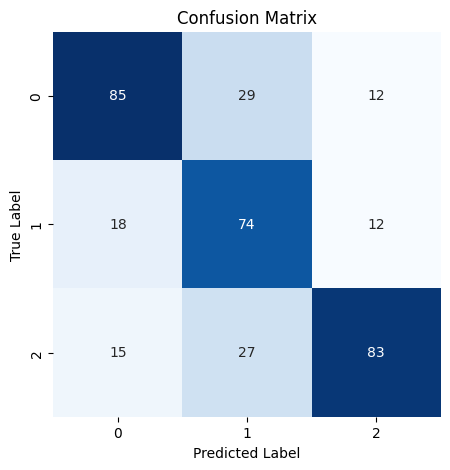

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=dt_clf.classes_, yticklabels=dt_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

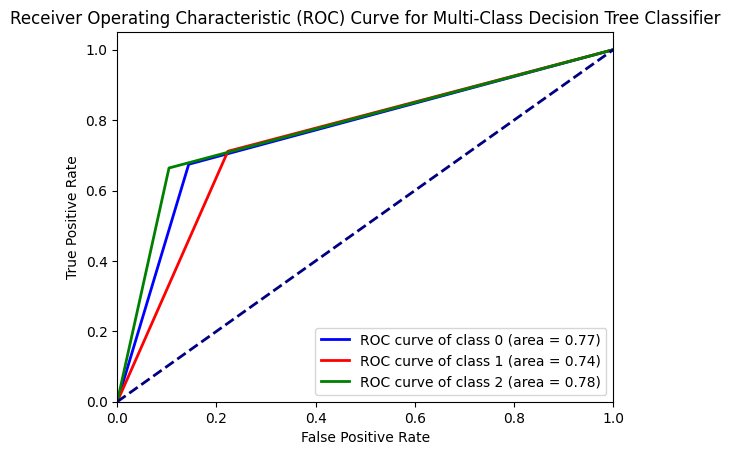

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report

y_score = dt_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

###Using Random Forest Classifier with 100 trees ensemble

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.6816901408450704
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       126
           1       0.62      0.62      0.62       104
           2       0.71      0.71      0.71       125

    accuracy                           0.68       355
   macro avg       0.68      0.68      0.68       355
weighted avg       0.68      0.68      0.68       355



In [ ]:
feature_importances = rf_clf.feature_importances_

# Get feature names
encoded_feature_names = ohe.get_feature_names_out(['Pos'])
all_feature_names = np.concatenate([encoded_feature_names, other_features.columns])

# Create DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features and their importances
print(importance_df)

                  Feature  Importance
10        Upper_ext_count    0.229765
12  Head-neck-trunk_count    0.210225
11        Lower_ext_count    0.135738
6          body_fat_perct    0.087509
7              FGA_per_MP    0.080077
8                      MP    0.077766
9                     TRB    0.072964
5                     age    0.060952
4                  Pos_SG    0.009862
2                  Pos_PG    0.009631
3                  Pos_SF    0.009321
0                   Pos_C    0.008426
1                  Pos_PF    0.007763


In [ ]:
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")

Weighted Average F1 Score: 0.6816901408450704


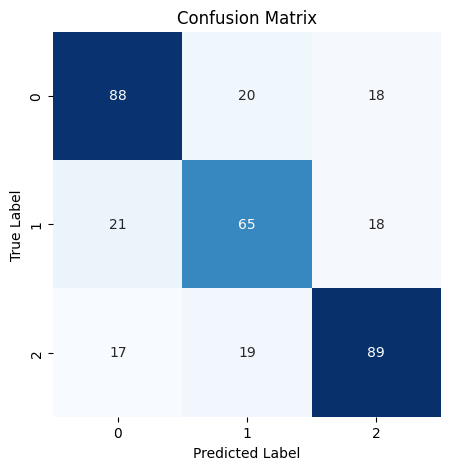

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

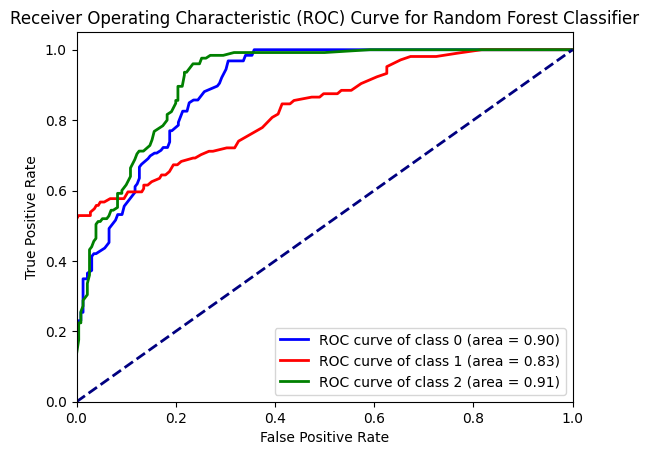

In [ ]:
y_score = rf_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

###Using XGBoost

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(n_estimators = 50,random_state=42)
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7098591549295775
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       126
           1       0.66      0.64      0.65       104
           2       0.75      0.74      0.74       125

    accuracy                           0.71       355
   macro avg       0.71      0.71      0.71       355
weighted avg       0.71      0.71      0.71       355



In [ ]:
feature_importances = xgb_clf.feature_importances_

# Get feature names
encoded_feature_names = ohe.get_feature_names_out(['Pos'])
all_feature_names = np.concatenate([encoded_feature_names, other_features.columns])

# Create DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features and their importances
print(importance_df)

                  Feature  Importance
12  Head-neck-trunk_count    0.280896
10        Upper_ext_count    0.269055
11        Lower_ext_count    0.091945
2                  Pos_PG    0.045598
3                  Pos_SF    0.044517
8                      MP    0.038292
6          body_fat_perct    0.038073
5                     age    0.037955
7              FGA_per_MP    0.035477
9                     TRB    0.034983
0                   Pos_C    0.034068
4                  Pos_SG    0.026980
1                  Pos_PF    0.022159


In [ ]:
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")

Weighted Average F1 Score: 0.709676354969257


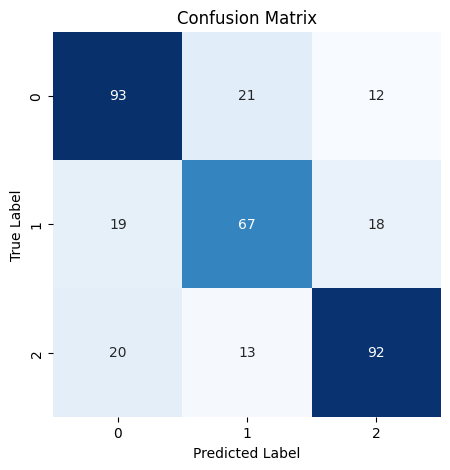

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=xgb_clf.classes_, yticklabels=xgb_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

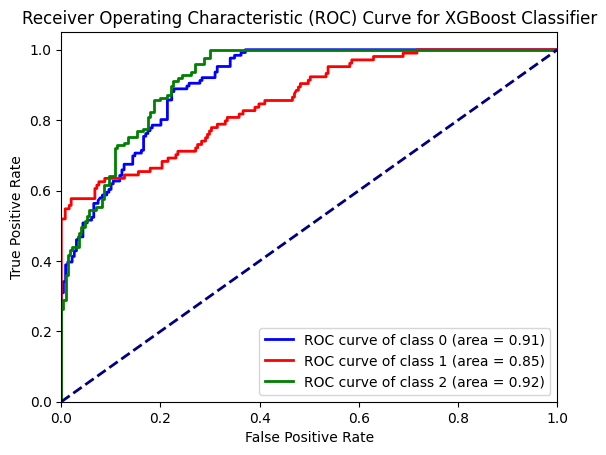

In [ ]:
y_score = xgb_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# #!pip install shap
# import shap

# explainer = shap.Explainer(xgb_clf)
# shap_values = explainer.shap_values(X_test)

# # Plot SHAP summary plot
# shap.summary_plot(shap_values=shap_values,
#                   features=X_test,
#                   #feature_names=feature_names_ohe,
#                   max_display=8,
#                   cmap=plt.get_cmap('nipy_spectral'), show=False)

##Using oversampling methods

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X = training_df.drop(columns=['Major anatomical areas'])
y = training_df['Major anatomical areas']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


oversampler = RandomOverSampler(sampling_strategy= 'auto',
                                  random_state=42)

X_oversampled, y_oversampled = oversampler.fit_resample(X, y_encoded)

print('Class distribution after oversampling:', Counter(y_oversampled))

Class distribution after oversampling: Counter({2: 2813, 0: 2813, 1: 2813})


In [ ]:
#Encoded classes
# 0 -> Head-neck-trunk
# 1 -> Lower extremity
# 2 -> Upper extremity

###Decision Tree Clf

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical features using OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = ohe.fit_transform(X_oversampled[['Pos']])

# Select training features
other_features = X_oversampled[['age', 'body_fat_perct',	'FGA_per_MP', 'MP','TRB','Upper_ext_count',	'Lower_ext_count','Head-neck-trunk_count']]

# Combine encoded and numerical features
X = np.concatenate([encoded_data, other_features], axis=1)
y = y_oversampled

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Make predictions
y_pred = dt_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9324644549763034
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       550
           1       0.97      0.83      0.89       570
           2       0.93      1.00      0.97       568

    accuracy                           0.93      1688
   macro avg       0.93      0.93      0.93      1688
weighted avg       0.94      0.93      0.93      1688



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
feature_importances = dt_clf.feature_importances_

# Get feature names
encoded_feature_names = ohe.get_feature_names_out(['Pos'])
all_feature_names = np.concatenate([encoded_feature_names, other_features.columns])

# Create DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features and their importances
print(importance_df)

                  Feature  Importance
12  Head-neck-trunk_count    0.287431
10        Upper_ext_count    0.214162
11        Lower_ext_count    0.133364
8                      MP    0.072201
6          body_fat_perct    0.071218
7              FGA_per_MP    0.070841
9                     TRB    0.065052
5                     age    0.046357
4                  Pos_SG    0.011155
2                  Pos_PG    0.009407
1                  Pos_PF    0.007696
0                   Pos_C    0.006518
3                  Pos_SF    0.004599


In [ ]:
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")

Weighted Average F1 Score: 0.9310843124133095


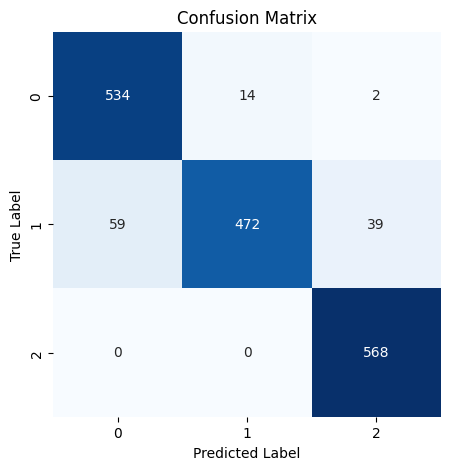

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=dt_clf.classes_, yticklabels=dt_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

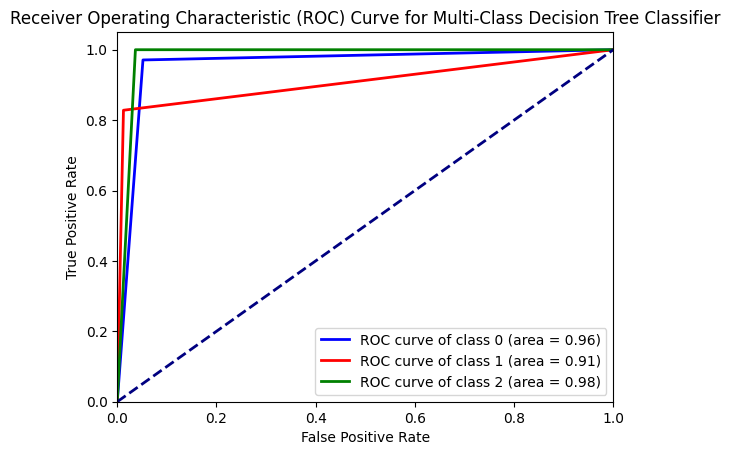

In [ ]:
y_score = dt_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

###Using RF Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9182464454976303
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       550
           1       0.97      0.79      0.87       570
           2       0.92      1.00      0.96       568

    accuracy                           0.92      1688
   macro avg       0.92      0.92      0.92      1688
weighted avg       0.92      0.92      0.92      1688



In [ ]:
feature_importances = rf_clf.feature_importances_

# Get feature names
encoded_feature_names = ohe.get_feature_names_out(['Pos'])
all_feature_names = np.concatenate([encoded_feature_names, other_features.columns])

# Create DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features and their importances
print(importance_df)

                  Feature  Importance
10        Upper_ext_count    0.243881
12  Head-neck-trunk_count    0.220282
11        Lower_ext_count    0.160578
6          body_fat_perct    0.073745
7              FGA_per_MP    0.072584
8                      MP    0.072125
9                     TRB    0.067342
5                     age    0.053505
2                  Pos_PG    0.007322
4                  Pos_SG    0.007304
1                  Pos_PF    0.007298
3                  Pos_SF    0.007200
0                   Pos_C    0.006833


In [ ]:
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")

Weighted Average F1 Score: 0.9159917531810646


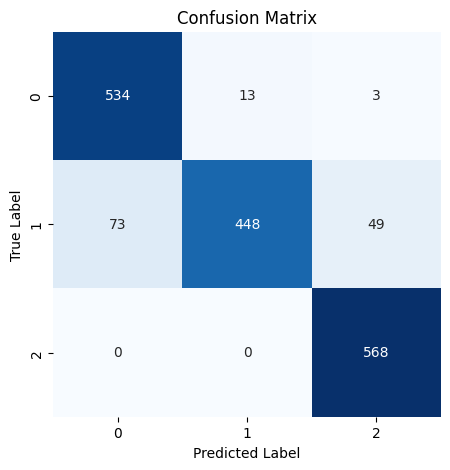

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

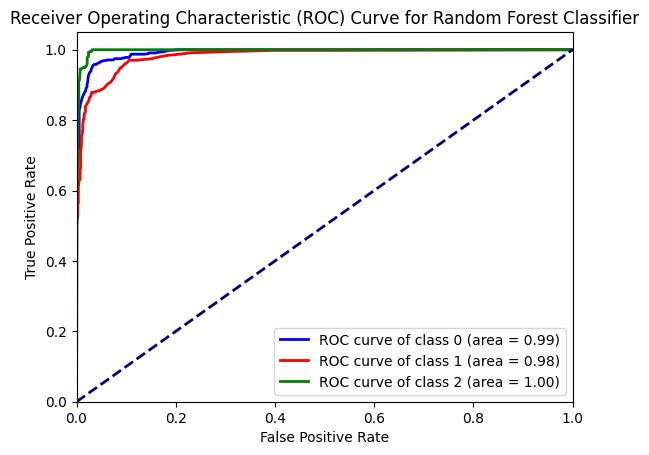

In [ ]:
y_score = rf_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

###Using XGBoost

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9117298578199052
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       550
           1       0.94      0.80      0.86       570
           2       0.91      0.99      0.95       568

    accuracy                           0.91      1688
   macro avg       0.91      0.91      0.91      1688
weighted avg       0.91      0.91      0.91      1688



In [ ]:
feature_importances = xgb_clf.feature_importances_

# Get feature names
encoded_feature_names = ohe.get_feature_names_out(['Pos'])
all_feature_names = np.concatenate([encoded_feature_names, other_features.columns])

# Create DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features and their importances
print(importance_df)

                  Feature  Importance
10        Upper_ext_count    0.307806
12  Head-neck-trunk_count    0.255031
11        Lower_ext_count    0.082681
4                  Pos_SG    0.042283
9                     TRB    0.040263
6          body_fat_perct    0.039221
8                      MP    0.039055
2                  Pos_PG    0.039036
5                     age    0.035516
7              FGA_per_MP    0.035193
1                  Pos_PF    0.032559
3                  Pos_SF    0.032385
0                   Pos_C    0.018971


In [ ]:
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")

Weighted Average F1 Score: 0.9098171756201872


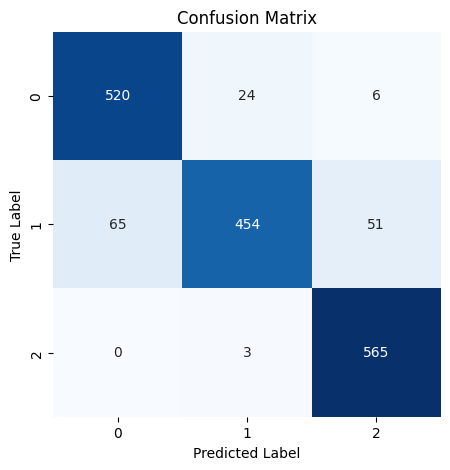

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=xgb_clf.classes_, yticklabels=xgb_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

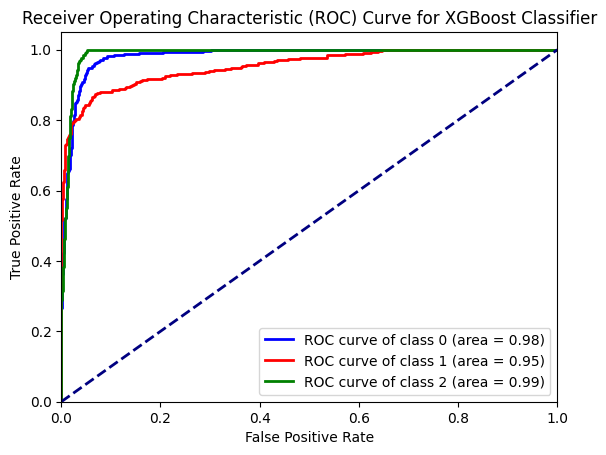

In [ ]:
y_score = xgb_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

##Using SMOTENC to balance

In [ ]:
from imblearn.over_sampling import SMOTENC
import pandas as pd

# # Load the dataset
data = training_df

# # Selecting specified features for X and the target for y
features = ['age', 'body_fat_perct', 'FGA_per_MP', 'MP', 'TRB', 'Pos','Upper_ext_count',	'Lower_ext_count','Head-neck-trunk_count','prev_injuries_count']
X = data[features]
y = data['Major anatomical areas']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Since 'Pos' is the only categorical feature among the ones selected, identify its index for SMOTENC
categorical_feature_indices = [X.columns.get_loc('Pos')]

# Apply SMOTENC, indicating the index of the categorical feature
smotenc = SMOTENC(categorical_features=categorical_feature_indices, random_state=42)
X_res, y_res = smotenc.fit_resample(X, y_encoded)




print('Class distribution after oversampling:', Counter(y_res))

Class distribution after oversampling: Counter({2: 2813, 0: 2813, 1: 2813})


In [ ]:
X_res

,age,body_fat_perct,FGA_per_MP,MP,TRB,Pos,Upper_ext_count,Lower_ext_count,Head-neck-trunk_count,prev_injuries_count
0,26.000000,17.835740,0.321429,22.400000,2.000000,PG,1,0,0,1
1,26.000000,17.835740,0.321429,22.400000,2.000000,PG,1,0,1,2
2,26.000000,17.835740,0.321429,22.400000,2.000000,PG,1,1,1,3
3,28.000000,15.491044,0.319149,18.800000,1.500000,PG,0,1,0,1
4,29.000000,15.651044,0.375000,21.600000,1.900000,PG,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...
8434,25.894147,19.774069,0.256824,14.221171,1.252927,PG,1,0,0,1
8435,24.000000,16.678812,0.390000,27.671435,4.500000,SF,1,0,0,2
8436,36.430571,22.895421,0.190403,7.676857,1.161572,C,1,1,0,3
8437,30.000000,18.191720,0.373127,31.259442,3.619504,SG,1,0,0,1


###Using Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical features using OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = ohe.fit_transform(X_res[['Pos']])

# Select training features
other_features = X_res[['age', 'body_fat_perct',	'FGA_per_MP', 'MP','TRB','Upper_ext_count',	'Lower_ext_count','Head-neck-trunk_count']]

# Combine encoded and numerical features
X = np.concatenate([encoded_data, other_features], axis=1)
# X= X_res[['age', 'body_fat_perct',	'FGA_per_MP', 'MP','TRB']]
y = y_res

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Make predictions
y_pred = dt_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7932464454976303
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       550
           1       0.73      0.76      0.75       570
           2       0.84      0.84      0.84       568

    accuracy                           0.79      1688
   macro avg       0.79      0.79      0.79      1688
weighted avg       0.79      0.79      0.79      1688



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
feature_importances = dt_clf.feature_importances_

# Get feature names
encoded_feature_names = ohe.get_feature_names_out(['Pos'])
all_feature_names = np.concatenate([encoded_feature_names, other_features.columns])

# Create DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features and their importances
print(importance_df)

                  Feature  Importance
12  Head-neck-trunk_count    0.289236
10        Upper_ext_count    0.227650
11        Lower_ext_count    0.110531
6          body_fat_perct    0.077104
8                      MP    0.069577
5                     age    0.065851
7              FGA_per_MP    0.064551
9                     TRB    0.063609
0                   Pos_C    0.009307
4                  Pos_SG    0.006699
3                  Pos_SF    0.006605
1                  Pos_PF    0.005228
2                  Pos_PG    0.004052


In [ ]:
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")

Weighted Average F1 Score: 0.7936282583244856


Weighted Average F1 Score: 0.7936282583244856


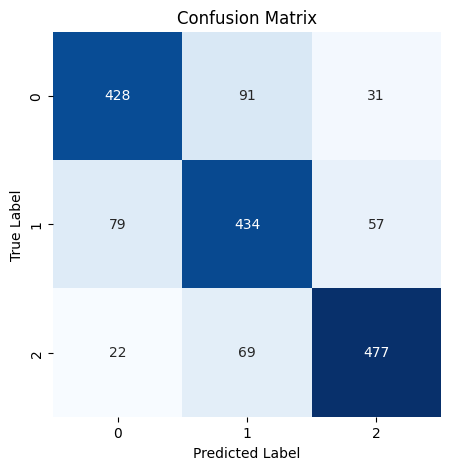

In [ ]:
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=dt_clf.classes_, yticklabels=dt_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

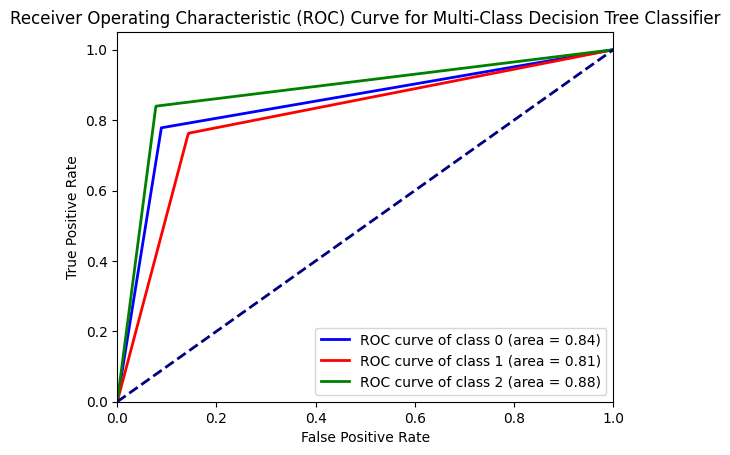

In [ ]:
y_score = dt_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

###Using Random Forest with 100 trees and entropy as hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8412322274881516
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       550
           1       0.81      0.77      0.79       570
           2       0.87      0.92      0.89       568

    accuracy                           0.84      1688
   macro avg       0.84      0.84      0.84      1688
weighted avg       0.84      0.84      0.84      1688



In [ ]:
feature_importances = rf_clf.feature_importances_

# Get feature names
encoded_feature_names = ohe.get_feature_names_out(['Pos'])
all_feature_names = np.concatenate([encoded_feature_names, other_features.columns])

# Create DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features and their importances
print(importance_df)

                  Feature  Importance
10        Upper_ext_count    0.241215
12  Head-neck-trunk_count    0.216063
11        Lower_ext_count    0.150923
8                      MP    0.074618
6          body_fat_perct    0.072796
5                     age    0.072505
9                     TRB    0.071167
7              FGA_per_MP    0.067258
1                  Pos_PF    0.007025
0                   Pos_C    0.006914
4                  Pos_SG    0.006873
2                  Pos_PG    0.006662
3                  Pos_SF    0.005982


Weighted Average F1 Score: 0.8402498572275282


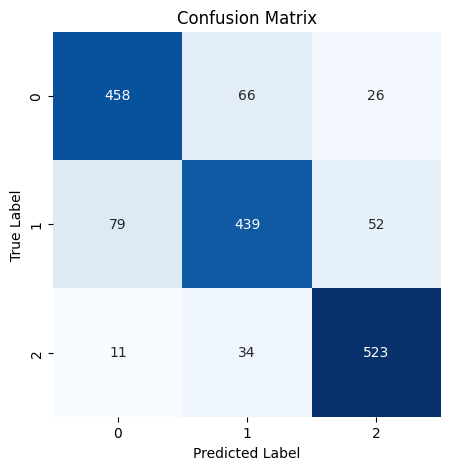

In [ ]:
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

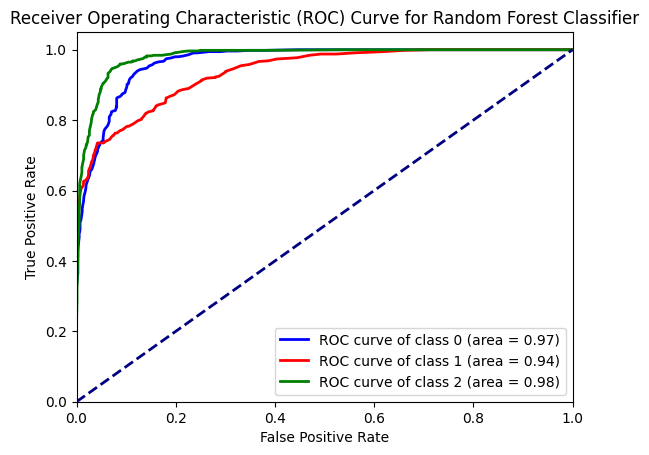

In [ ]:
y_score = rf_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

###Using XGBoost clf

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective='multi:softprob',eval_metric='mlogloss',random_state=42)
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.8619668246445498
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       550
           1       0.84      0.81      0.83       570
           2       0.87      0.93      0.90       568

    accuracy                           0.86      1688
   macro avg       0.86      0.86      0.86      1688
weighted avg       0.86      0.86      0.86      1688



In [ ]:
feature_importances = xgb_clf.feature_importances_

# Get feature names
encoded_feature_names = ohe.get_feature_names_out(['Pos'])
all_feature_names = np.concatenate([encoded_feature_names, other_features.columns])

# Create DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features and their importances
print(importance_df)

                  Feature  Importance
10        Upper_ext_count    0.334107
12  Head-neck-trunk_count    0.286268
11        Lower_ext_count    0.088476
5                     age    0.045002
4                  Pos_SG    0.036029
0                   Pos_C    0.029797
9                     TRB    0.028049
8                      MP    0.027573
6          body_fat_perct    0.026718
1                  Pos_PF    0.025678
2                  Pos_PG    0.025337
3                  Pos_SF    0.024601
7              FGA_per_MP    0.022364


Weighted Average F1 Score: 0.8613299314512127


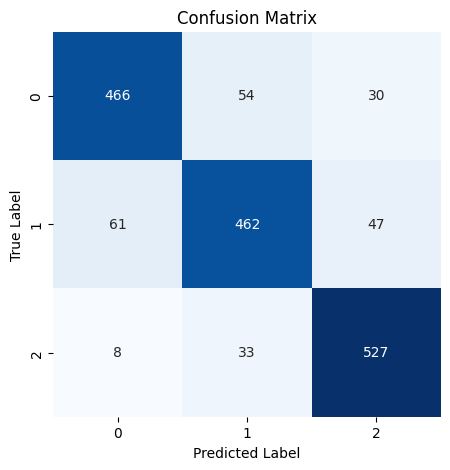

In [ ]:
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=xgb_clf.classes_, yticklabels=xgb_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

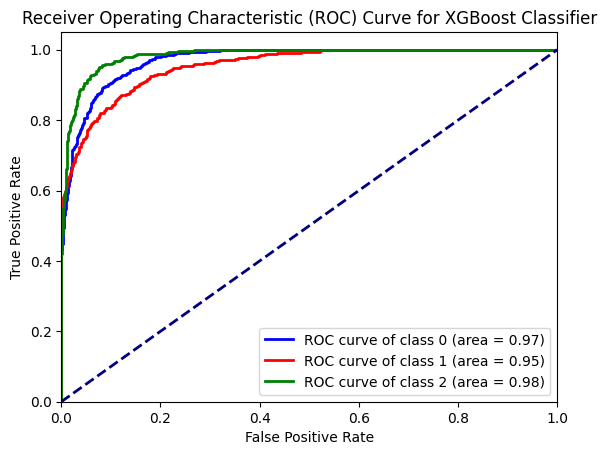

In [ ]:
y_score = xgb_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

#Let's try to combine the injuries and see what the results are

##Undersampled Data

###Decision Tree

In [ ]:

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = ohe.fit_transform(X_undersampled[['Pos']])

# Select training features
other_features = X_undersampled[['age', 'body_fat_perct',	'FGA_per_MP', 'MP','TRB','prev_injuries_count']]


# Combine encoded and numerical features
X = np.concatenate([encoded_data, other_features], axis=1)
y = y_undersampled

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Make predictions
y_pred = dt_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.3408450704225352
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.33      0.33       126
           1       0.25      0.26      0.25       104
           2       0.42      0.42      0.42       125

    accuracy                           0.34       355
   macro avg       0.34      0.34      0.34       355
weighted avg       0.34      0.34      0.34       355



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
feature_importances = dt_clf.feature_importances_

# Get feature names
encoded_feature_names = ohe.get_feature_names_out(['Pos'])
all_feature_names = np.concatenate([encoded_feature_names, other_features.columns])

# Create DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features and their importances
print(importance_df)

                Feature  Importance
10  prev_injuries_count    0.267822
6        body_fat_perct    0.183113
7            FGA_per_MP    0.165134
8                    MP    0.127309
9                   TRB    0.101636
5                   age    0.081200
2                Pos_PG    0.022784
3                Pos_SF    0.014699
1                Pos_PF    0.014160
4                Pos_SG    0.012158
0                 Pos_C    0.009986


In [ ]:
from sklearn.metrics import f1_score

# Calculate weighted average F1 score
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")

Weighted Average F1 Score: 0.34139762449934824


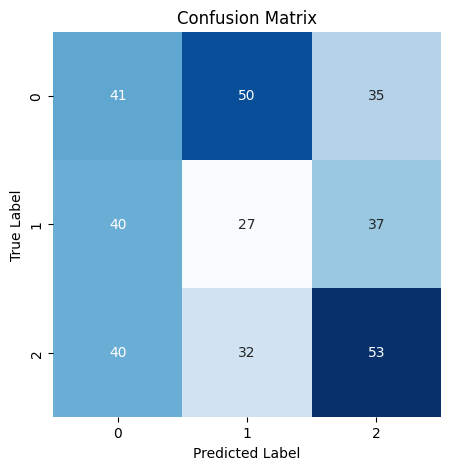

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=dt_clf.classes_, yticklabels=dt_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

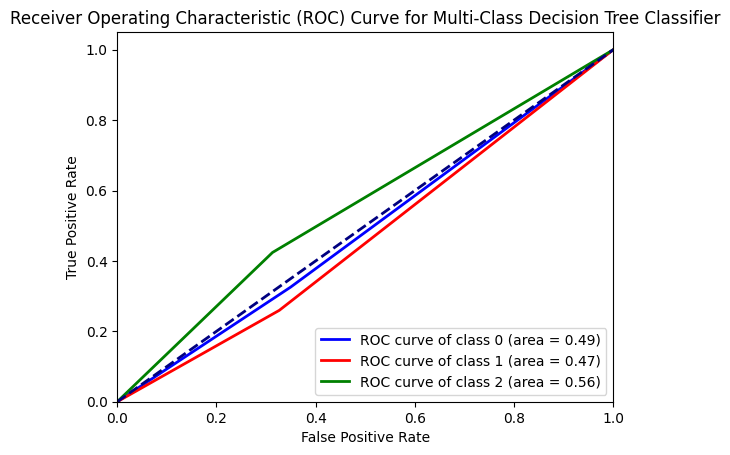

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report

y_score = dt_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

###Using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.3408450704225352
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.33      0.35       126
           1       0.28      0.34      0.31       104
           2       0.39      0.35      0.37       125

    accuracy                           0.34       355
   macro avg       0.34      0.34      0.34       355
weighted avg       0.35      0.34      0.34       355



In [ ]:
feature_importances = rf_clf.feature_importances_

# Get feature names
encoded_feature_names = ohe.get_feature_names_out(['Pos'])
all_feature_names = np.concatenate([encoded_feature_names, other_features.columns])

# Create DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features and their importances
print(importance_df)

                Feature  Importance
10  prev_injuries_count    0.172214
6        body_fat_perct    0.169183
7            FGA_per_MP    0.166845
8                    MP    0.157847
9                   TRB    0.146048
5                   age    0.118144
3                Pos_SF    0.015059
4                Pos_SG    0.014626
2                Pos_PG    0.013864
1                Pos_PF    0.013223
0                 Pos_C    0.012947


In [ ]:
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")

Weighted Average F1 Score: 0.3422830555478015


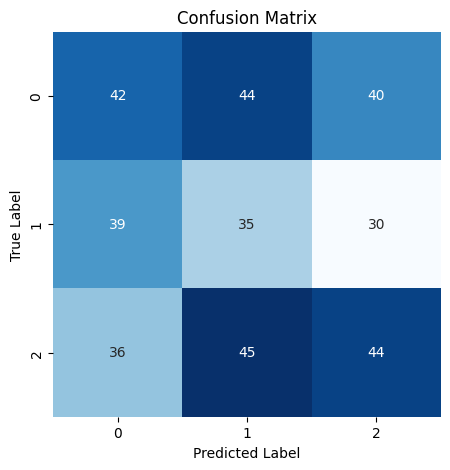

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

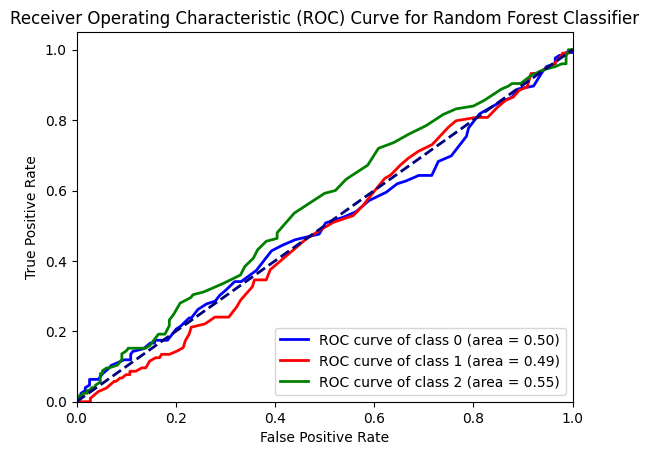

In [ ]:
y_score = rf_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

###Using XGBoost Classifier

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(n_estimators = 50,random_state=42)
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.3352112676056338
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.35      0.36       126
           1       0.28      0.33      0.30       104
           2       0.37      0.33      0.35       125

    accuracy                           0.34       355
   macro avg       0.34      0.33      0.33       355
weighted avg       0.34      0.34      0.34       355



In [ ]:
feature_importances = xgb_clf.feature_importances_

# Get feature names
encoded_feature_names = ohe.get_feature_names_out(['Pos'])
all_feature_names = np.concatenate([encoded_feature_names, other_features.columns])

# Create DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features and their importances
print(importance_df)

                Feature  Importance
8                    MP    0.102738
1                Pos_PF    0.100773
9                   TRB    0.100291
7            FGA_per_MP    0.100227
6        body_fat_perct    0.097421
5                   age    0.090777
10  prev_injuries_count    0.088206
3                Pos_SF    0.085299
4                Pos_SG    0.085107
2                Pos_PG    0.081012
0                 Pos_C    0.068148


In [ ]:
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")

Weighted Average F1 Score: 0.3365551455520176


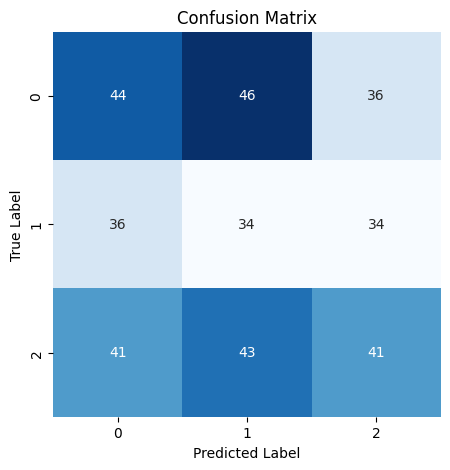

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=xgb_clf.classes_, yticklabels=xgb_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

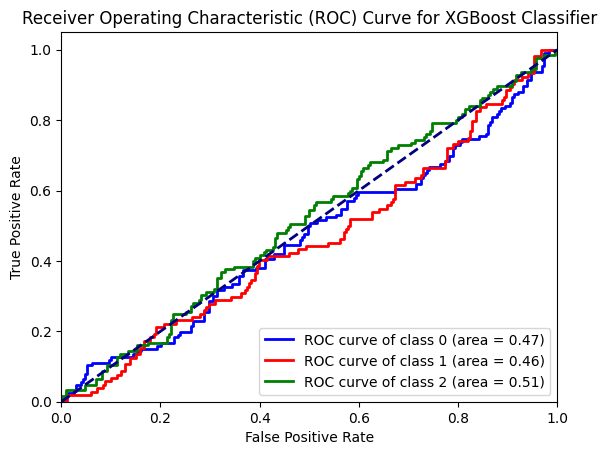

In [ ]:
y_score = xgb_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

##Using Oversampled Data

###Using Decision tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical features using OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = ohe.fit_transform(X_oversampled[['Pos']])

# Select training features
other_features = X_oversampled[['age', 'body_fat_perct',	'FGA_per_MP', 'MP','TRB','prev_injuries_count']]

# Combine encoded and numerical features
X = np.concatenate([encoded_data, other_features], axis=1)
y = y_oversampled

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Make predictions
y_pred = dt_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.856042654028436
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.87       550
           1       0.94      0.62      0.75       570
           2       0.87      0.99      0.93       568

    accuracy                           0.86      1688
   macro avg       0.87      0.86      0.85      1688
weighted avg       0.87      0.86      0.85      1688



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
feature_importances = dt_clf.feature_importances_

# Get feature names
encoded_feature_names = ohe.get_feature_names_out(['Pos'])
all_feature_names = np.concatenate([encoded_feature_names, other_features.columns])

# Create DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features and their importances
print(importance_df)

                Feature  Importance
10  prev_injuries_count    0.279545
7            FGA_per_MP    0.161719
6        body_fat_perct    0.160115
8                    MP    0.138102
9                   TRB    0.115411
5                   age    0.096080
1                Pos_PF    0.011718
2                Pos_PG    0.010651
0                 Pos_C    0.009608
3                Pos_SF    0.008873
4                Pos_SG    0.008177


In [ ]:
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")

Weighted Average F1 Score: 0.8480135694508749


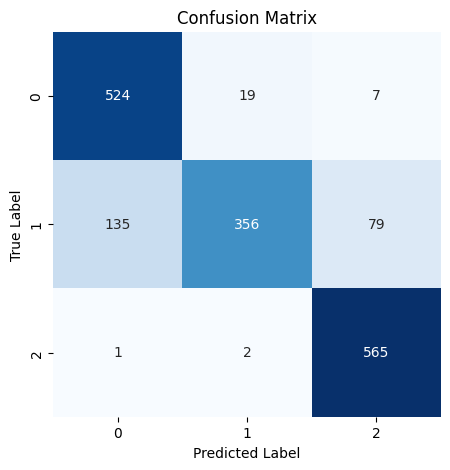

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=dt_clf.classes_, yticklabels=dt_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

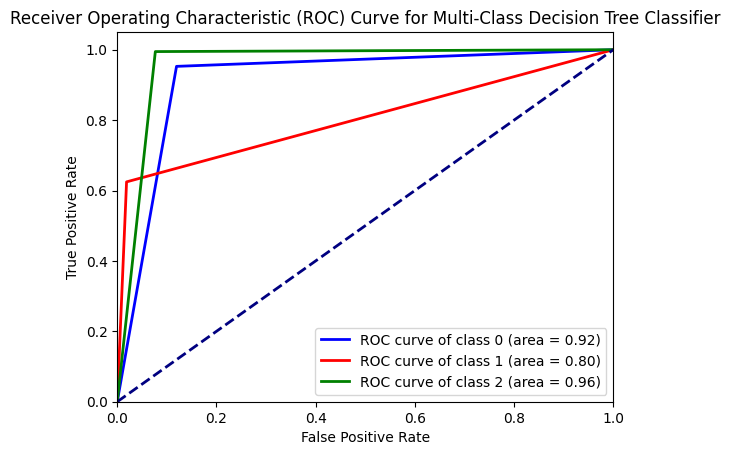

In [ ]:
y_score = dt_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

###Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8975118483412322
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       550
           1       0.95      0.74      0.84       570
           2       0.90      1.00      0.95       568

    accuracy                           0.90      1688
   macro avg       0.90      0.90      0.89      1688
weighted avg       0.90      0.90      0.89      1688



In [ ]:
feature_importances = rf_clf.feature_importances_

# Get feature names
encoded_feature_names = ohe.get_feature_names_out(['Pos'])
all_feature_names = np.concatenate([encoded_feature_names, other_features.columns])

# Create DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features and their importances
print(importance_df)

                Feature  Importance
10  prev_injuries_count    0.241843
7            FGA_per_MP    0.157365
6        body_fat_perct    0.155666
8                    MP    0.150613
9                   TRB    0.136501
5                   age    0.104291
1                Pos_PF    0.011739
3                Pos_SF    0.011345
2                Pos_PG    0.010852
4                Pos_SG    0.010208
0                 Pos_C    0.009577


In [ ]:
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")

Weighted Average F1 Score: 0.89423719110547


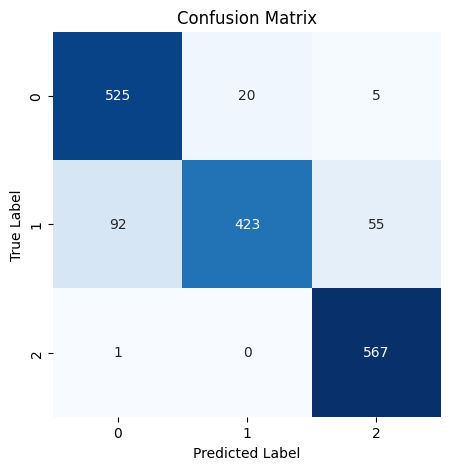

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

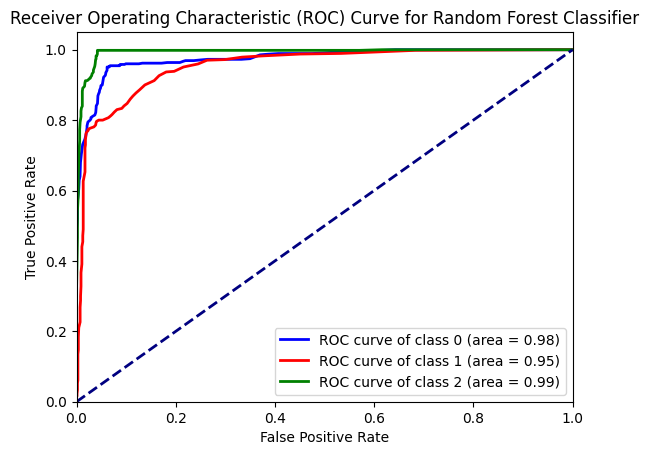

In [ ]:
y_score = rf_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

###Using XGBoost Classifier

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8157582938388626
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       550
           1       0.83      0.66      0.73       570
           2       0.85      0.94      0.89       568

    accuracy                           0.82      1688
   macro avg       0.82      0.82      0.81      1688
weighted avg       0.82      0.82      0.81      1688



In [ ]:
feature_importances = xgb_clf.feature_importances_

# Get feature names
encoded_feature_names = ohe.get_feature_names_out(['Pos'])
all_feature_names = np.concatenate([encoded_feature_names, other_features.columns])

# Create DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features and their importances
print(importance_df)

                Feature  Importance
1                Pos_PF    0.108554
8                    MP    0.104703
9                   TRB    0.102217
6        body_fat_perct    0.101059
7            FGA_per_MP    0.098058
2                Pos_PG    0.088531
5                   age    0.085661
4                Pos_SG    0.082282
3                Pos_SF    0.080742
0                 Pos_C    0.074989
10  prev_injuries_count    0.073204


In [ ]:
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")

Weighted Average F1 Score: 0.811471438215395


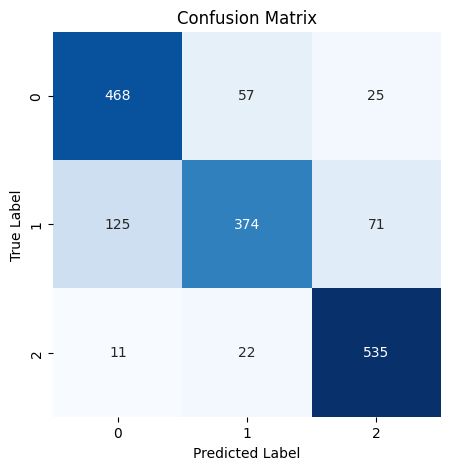

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=xgb_clf.classes_, yticklabels=xgb_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

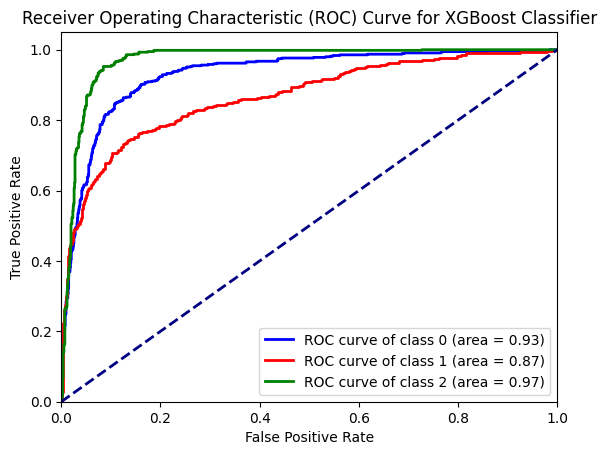

In [ ]:
y_score = xgb_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

##SMOTENC Sampled data

###Using Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical features using OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = ohe.fit_transform(X_res[['Pos']])

# Select training features
other_features = X_res[['age', 'body_fat_perct',	'FGA_per_MP', 'MP','TRB','prev_injuries_count']]

# Combine encoded and numerical features
X = np.concatenate([encoded_data, other_features], axis=1)
# X= X_res[['age', 'body_fat_perct',	'FGA_per_MP', 'MP','TRB']]
y = y_res

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Make predictions
y_pred = dt_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.6018957345971564
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       550
           1       0.57      0.59      0.58       570
           2       0.66      0.63      0.64       568

    accuracy                           0.60      1688
   macro avg       0.60      0.60      0.60      1688
weighted avg       0.60      0.60      0.60      1688



In [ ]:
feature_importances = dt_clf.feature_importances_

# Get feature names
encoded_feature_names = ohe.get_feature_names_out(['Pos'])
all_feature_names = np.concatenate([encoded_feature_names, other_features.columns])

# Create DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features and their importances
print(importance_df)

                Feature  Importance
10  prev_injuries_count    0.193319
8                    MP    0.169231
5                   age    0.163603
6        body_fat_perct    0.152786
7            FGA_per_MP    0.143368
9                   TRB    0.123155
1                Pos_PF    0.020251
2                Pos_PG    0.012774
0                 Pos_C    0.009390
4                Pos_SG    0.006469
3                Pos_SF    0.005654


In [ ]:
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")

Weighted Average F1 Score: 0.6023323033076933


Weighted Average F1 Score: 0.6023323033076933


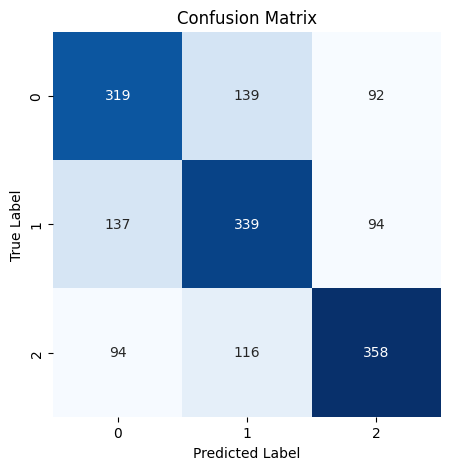

In [ ]:
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=dt_clf.classes_, yticklabels=dt_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

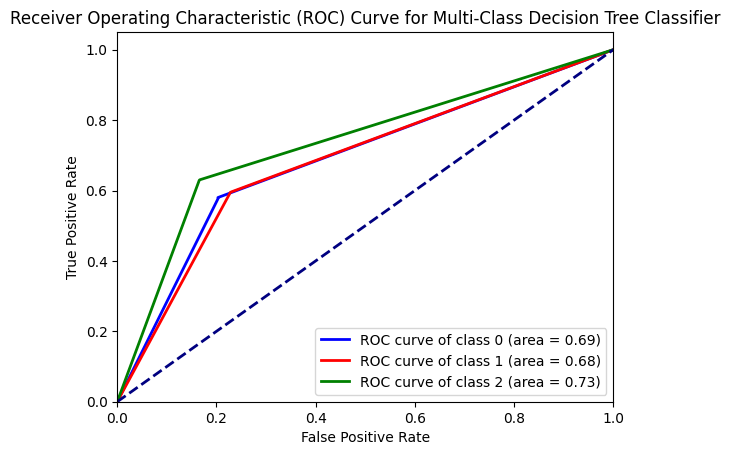

In [ ]:
y_score = dt_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

###Random Forest with specific hyperparams

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.6960900473933649
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       550
           1       0.64      0.65      0.65       570
           2       0.76      0.74      0.75       568

    accuracy                           0.70      1688
   macro avg       0.70      0.70      0.70      1688
weighted avg       0.70      0.70      0.70      1688



In [ ]:
feature_importances = rf_clf.feature_importances_

# Get feature names
encoded_feature_names = ohe.get_feature_names_out(['Pos'])
all_feature_names = np.concatenate([encoded_feature_names, other_features.columns])

# Create DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features and their importances
print(importance_df)

                Feature  Importance
8                    MP    0.173208
6        body_fat_perct    0.162308
5                   age    0.156643
9                   TRB    0.155092
10  prev_injuries_count    0.154450
7            FGA_per_MP    0.148358
1                Pos_PF    0.011866
2                Pos_PG    0.009880
0                 Pos_C    0.009805
3                Pos_SF    0.009634
4                Pos_SG    0.008757


Weighted Average F1 Score: 0.6964957550314638


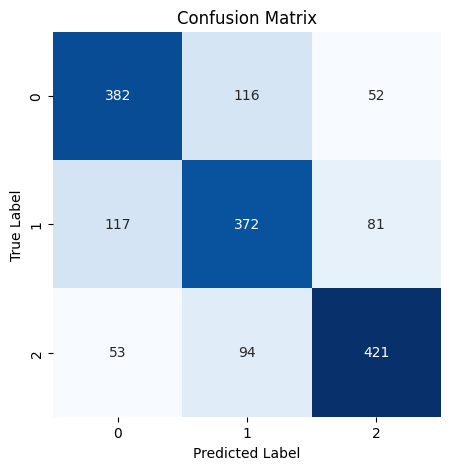

In [ ]:
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

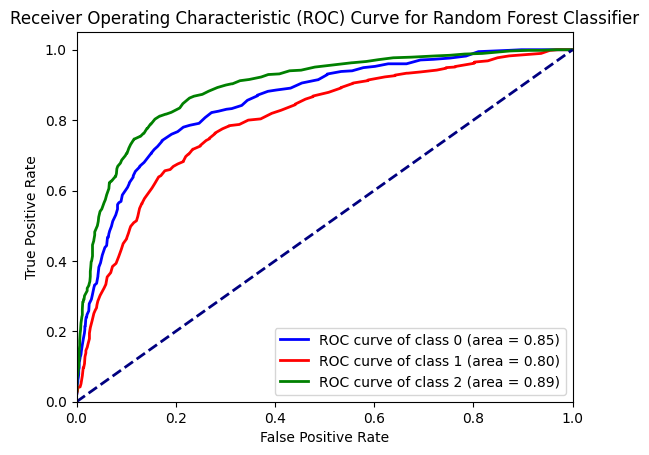

In [ ]:
y_score = rf_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

###Using XGBoost clf

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective='multi:softprob',eval_metric='mlogloss',random_state=42)
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.7031990521327014
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       550
           1       0.66      0.72      0.69       570
           2       0.75      0.73      0.74       568

    accuracy                           0.70      1688
   macro avg       0.71      0.70      0.70      1688
weighted avg       0.70      0.70      0.70      1688



In [ ]:
feature_importances = xgb_clf.feature_importances_

# Get feature names
encoded_feature_names = ohe.get_feature_names_out(['Pos'])
all_feature_names = np.concatenate([encoded_feature_names, other_features.columns])

# Create DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features and their importances
print(importance_df)

                Feature  Importance
5                   age    0.151749
1                Pos_PF    0.139260
4                Pos_SG    0.117533
8                    MP    0.083379
9                   TRB    0.080802
0                 Pos_C    0.080702
6        body_fat_perct    0.078821
2                Pos_PG    0.073229
7            FGA_per_MP    0.069392
10  prev_injuries_count    0.068660
3                Pos_SF    0.056474


Weighted Average F1 Score: 0.7033328715117981


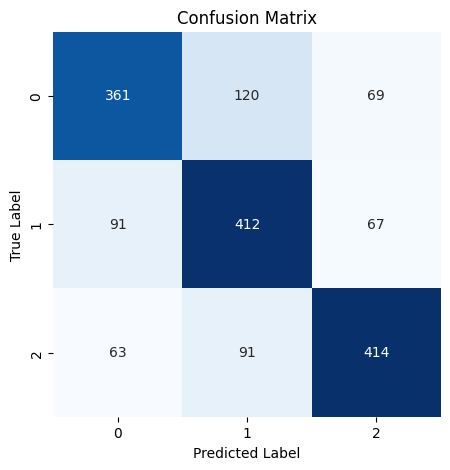

In [ ]:
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the weighted average F1 score along with other evaluation metrics
print(f"Weighted Average F1 Score: {weighted_f1_score}")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=xgb_clf.classes_, yticklabels=xgb_clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

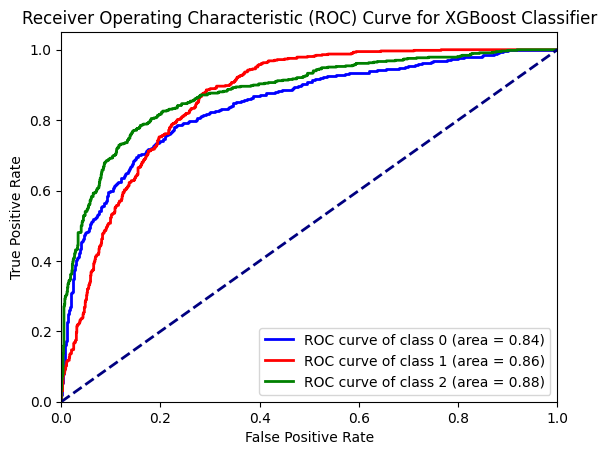

In [ ]:
y_score = xgb_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# # Compute SHAP values
# # !pip install shap
# import shap
# explainer = shap.Explainer(dt_clf)
# shap_values = explainer(X_test)

# # Summary plot
# shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
# features = list(X_train)
# feature_importances = dt_clf.feature_importances_
# importances = pd.DataFrame(index=features)
# importances['importance'] = feature_importances
# importances['rank'] = importances['importance'].rank(ascending=False).values
# importances.sort_values('rank').head()

In [ ]:
# fig = plt.figure(figsize=(6,6))

# shap.summary_plot(shap_values = shapley_values_train,
#                   features = X_train.values,
#                   feature_names = X_train.columns.values,
#                   max_display=15,
#                   show=False)
# plt.tight_layout()
# plt.show()

### Visualizations

1.   Per season injury with categories
2.   Height and weight distribution
3. Injury per team seasonwise
4. ROC curve